# **Project Name**    - **`Topic Modeling on news Articles`**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

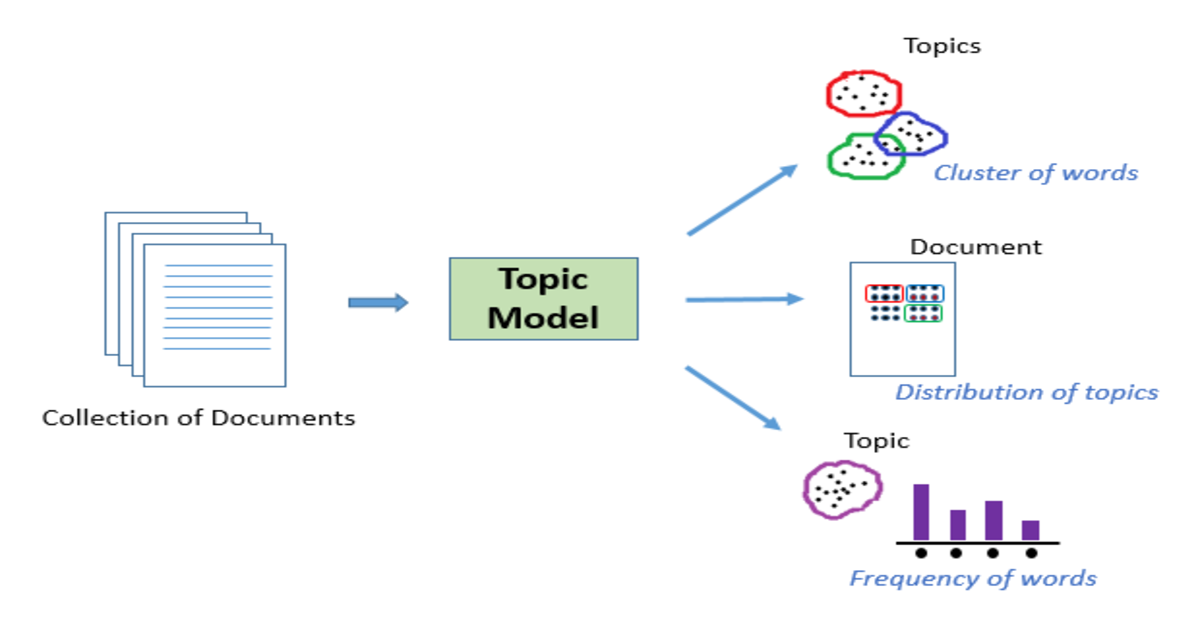

**Project Goals:**
1. Topic Discovery: The primary goal of the project is to identify and extract latent topics present in a corpus of news articles. These topics should represent the major themes or subjects discussed in the news.

2. Content Understanding: By applying topic modeling, we aim to gain a deeper understanding of the content within the news articles. This includes uncovering the key issues, events, and trends covered in the news.

3. Categorization: Once topics are identified, news articles can be categorized into these topics, making it easier to organize and retrieve articles by subject matter.

4. Content Recommendation: The discovered topics can be used to recommend related news articles to readers, enhancing the user experience on news websites or apps.

**Challenges and Considerations:**
1. Topic Number Selection: Selecting an appropriate number of topics (K) is a critical step. Experimentation may be needed to determine the optimal K.

2. Quality of Data: The quality of the news articles and the diversity of sources can impact the results.

3. Evaluation Metrics: Choosing the right evaluation metrics to assess the quality of the topic modeling results can be challenging.

4. Model Interpretability: Ensuring that the topics are interpretable and meaningful requires careful analysis and labeling.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Key Project Steps:**
1. Data Collection: Gather a substantial corpus of news articles from reliable sources. These articles should cover a diverse range of topics and time periods.

2. Data Preprocessing: Prepare the text data by performing tasks such as tokenization, stop word removal, stemming/lemmatization, and creating a document-term matrix.

3. Topic Modeling: Apply a topic modeling algorithm, such as Latent Dirichlet Allocation (LDA), to the preprocessed data to identify underlying topics within the articles.

4. Model Evaluation: Assess the quality of the topic modeling results using metrics like perplexity, coherence, or manual evaluation of topic-word distributions.

5. Interpretation: Interpret the topics by examining the most probable words associated with each topic. This step involves qualitative analysis to assign meaningful labels to topics.

6. Topic Visualization: Create visualizations such as word clouds, topic distribution bar plots, and topic-document heatmaps to present the results in an easily understandable format.

7. Categorization and Recommendation: Use the trained LDA model to categorize news articles into topics and implement a content recommendation system based on topic similarity.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import spacy
nlp = spacy.load("en_core_web_sm")
import plotly.graph_objects as go
!pip install contractions
import contractions
import gensim
from pprint import pprint
import gensim.corpora as corpora
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import CoherenceModel
from gensim.models import TfidfModel
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
from wordcloud import WordCloud
! pip install umap-learn --upgrade
import umap

In [ ]:
print(np.__version__)

### Dataset Loading

In [ ]:
! git clone https://github.com/itssameerkhan/topic_modellig_BBC.git

In [ ]:
# Load Dataset
path="/content/topic_modellig_BBC"
folders=["business","entertainment","politics","sport","tech"]
news=[]
category=[]
for i in folders:
  files=os.listdir(path+"/"+i)
  for text_file in files:
    with open(path+"/"+i+"/"+text_file,'rb') as text:
     news.append(text.read())
     category.append(i)

df={
    'category':category,
    'news':news
}
df=pd.DataFrame(df)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Number of rows is :{df.shape[0]}")
print(f"Number of columns is :{df.shape[1]}")

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f" number of duplicate value is :{df.duplicated().sum()}")

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull())

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe()

### Variables Description

1. category :- this show the category on that article.
2. news :- article of that news.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(f"--news variable have total number of {df['news'].nunique()} unique value and in this variable all the row are differ from each other.")
print(f"--category variable have total number of {df['category'].nunique()} unique values which are {df['category'].unique()}")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#converting the datatype of each variable
df['news']=df['news'].astype('str')
df['category']=df['category'].astype('category')

In [ ]:
#coping the dataset for EDA.
data=df.copy()

In [ ]:
# Write your code to make your dataset analysis ready.
nlp = spacy.load("en_core_web_sm")
STOP_WORDS = nlp.Defaults.stop_words
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words)

def feature_extract(data,d):
    data['word_count']=data[d].apply(lambda x: len(str(x).split()))
    data['length']=data[d].apply(lambda x: len(x))
    data['avg word_len'] = data[d].apply(lambda x:get_avg_word_len(x))
    data['stop_words_len'] = data[d].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))
    data['numeric_count'] = data[d].apply(lambda x:len([t for t in x.split()if t.isdigit()] ))
    data['upper_counts'] = data[d].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))
    data['polarity'] = data[d].map(lambda text: TextBlob(text).sentiment.polarity)

feature_extract(data,'news')

### What all manipulations have you done and insights you found?

* converting the datatype of each variable .
* create some new columns based on there criteria.
 1. count :- sentence count
 2. char count :- this show charecter count of news article.
 3. avg word_len :- this show the average word lenth of that news article.
 4. stop_words_len :- how many stope words are presend in the the news article.
 5. numeric_count :- how many numeric value present in the article.
 6. upper_counts :- this show the number of word which is in upper formate.
 7. polarity :- this show the sentiment polarity of that aritcle.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 :- **`Number of article in each categories.`**

In [ ]:
data.category.unique()

In [ ]:
# Chart - 1 visualization code
fig=go.Figure()
fig.add_trace(go.Bar(x=data['category'].value_counts().index,y=data['category'].value_counts().values,marker=
                     dict(color=['red','green','yellow','pink'])))
fig.update_yaxes(title_text='number of articles')
fig.show()

##### 1. Why did you pick the specific chart?

this show the number of article in each categoires.

##### 2. What is/are the insight(s) found from the chart?

* here we can see that sport and business have same amout of articles.
* each categories have articles between 400 to 500 articles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes.

#### Chart - 2 :- `how much words are used in each categories.`

In [ ]:
g_wc=data.groupby('category')['word_count'].sum()


In [ ]:
# Chart - 2 visualization code
fig=go.Figure()
fig.add_trace(go.Bar(x=g_wc.index,y=g_wc.values))
fig.update_layout(title_text='number of words in each categories',title_x=0.5,title_y=0.85,font=dict(family='bold',size=15))
fig.show()

##### 1. Why did you pick the specific chart?

this show, how much words are used in each categories.

##### 2. What is/are the insight(s) found from the chart?

* In tech category aprox 200k words are used which is heighest .
* and second highest is politics category which have aprox 187k words.
* and entertainment have least amount of words which is 125k.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

this will help us in understanding of word presentation in categories.

#### Chart - 3 :- **`which categories article have maximum word count.`**

In [ ]:
# Chart - 3 visualization code
fig=go.Figure()
fig.add_trace(go.Scatter(y=data['word_count'][data['category']=='business'],mode='markers',marker=dict(color='yellow'),name='business'))
fig.add_trace(go.Scatter(y=data['word_count'][data['category']=='entertainment'],mode='markers',marker=dict(color='blue'),name='entertainment'))
fig.add_trace(go.Scatter(y=data['word_count'][data['category']=='politics'],
                         mode='markers+text',marker=dict(color='red'),name='politics',
                         text=['This is the max word count in between all categories' if i==data['word_count'].max() else '' for i in data['word_count'][data['category']=='politics'] ],
                         textposition='top center'))
fig.add_trace(go.Scatter(y=data['word_count'][data['category']=='sport'],mode='markers',marker=dict(color='green'),name='sport'))
fig.add_trace(go.Scatter(y=data['word_count'][data['category']=='tech'],mode='markers',marker=dict(color='pink'),name='tech'))
fig.update_xaxes(type='category', tickvals=[])
fig.update_layout(title_text='word count by categories',font=dict(family='Courier New, monospace',size=15),title_x=0.5,title_y=0.85)
fig.update_yaxes(title_text='word count')
fig.show()

##### 1. Why did you pick the specific chart?

this show ,which categories article have maximum word count.

##### 2. What is/are the insight(s) found from the chart?

here we can see the 'politics' have a article which have word_count 4377 which is maximum of all.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes.

#### Chart - 4 :- **`which categories have maximum length.`**

In [ ]:
ch_count=data.groupby('category')['length'].sum()

In [ ]:
# Chart - 4 visualization code
fig=go.Figure()
fig.add_trace(go.Bar(x=ch_count.index,y=ch_count.values))
fig.show()

##### 1. Why did you pick the specific chart?

this show, which categories have maximum charector length.

##### 2. What is/are the insight(s) found from the chart?

* Business have 1.03 million charector count.
* entertainment have 754k charector count which is minimum.
* politics have 1.13 million charector count.
* sport have 0.98 million charector count.
* tech have 1.2 million charector count which is maximum.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

this improve the knowladge about datset.

#### Chart - 5 :- **` what is aggregate of avrage word length in articles.`**

In [ ]:
# Chart - 5 visualization code
category,max,min,mean=[],[],[],[]
for i in data.category.unique():
  category.append(i)
  max.append(data['avg word_len'][data.category==i].max())
  min.append(data['avg word_len'][data.category==i].min())
  mean.append(data['avg word_len'][data.category==i].mean())
fig=go.Figure()
fig.add_trace(go.Bar(x=category,y=max,name='maximum'))
fig.add_trace(go.Bar(x=category,y=min,name='minimum'))
fig.add_trace(go.Bar(x=category,y=mean,name='mean'))
fig.update_layout(title_text='aggregate of average word length in articles',title_x=0.5,title_y=0.85,font=dict(size=15,family='bold'))
fig.show()

##### 1. Why did you pick the specific chart?

this show, aggregate of avrage word length.

##### 2. What is/are the insight(s) found from the chart?

* Highest average word lenth is apears in sport category which is 6.8 .
* mean average word length is same each categories .
* minimum average word length is also aprox same in each categories .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes.

#### Chart - 6 :- **`total stop words in each categories.`**

In [ ]:
# Chart - 6 visualization code
g_swl=data.groupby('category')['stop_words_len'].sum()
fig=go.Figure()
fig.add_trace(go.Bar(x=g_swl.index,y=g_swl.values))
fig.update_layout(title_text='total stop words in each categories',title_x=0.5,title_y=0.85,font=dict(size=15,family='bold'))
fig.show()

##### 1. Why did you pick the specific chart?

this show, total stop words in each categories.

##### 2. What is/are the insight(s) found from the chart?

* business have 60k stop words.
* entertainment have 45k stop words which is minimum.
* politics have 73k stop words.
* sport have 64k stop words.
* tech have 77k stop words which is maximum.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes.

#### Chart - 7 :- **`what is average stop words in articels in each categories.`**

In [ ]:
# Chart - 7 visualization code
g_swm=data.groupby('category')['stop_words_len'].mean()
fig=go.Figure()
fig.add_trace(go.Bar(x=g_swm.index,y=g_swm.values))
fig.update_layout(title_text='mean stop words in article by each categories',title_x=0.5,title_y=0.85,font=dict(size=15,family='bold'))
fig.show()

##### 1. Why did you pick the specific chart?

thia show, what is average stop words in articels in each categories.

##### 2. What is/are the insight(s) found from the chart?

* business articles have aprox 130 spot words in each articles.
* entertainment articles have aprox 129 stop words.
* politics articles have aprox 196 stop words.
* sport articles have aprox 141 stop words per articles.
* tech have maximum which is 217 stop words.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes.

#### Chart - 8 :- **`Total stop words in each categories.`**

In [ ]:
# Chart - 8 visualization code
g_swt=data.groupby('category')['stop_words_len'].sum()
fig=go.Figure()
fig.add_trace(go.Bar(x=g_swt.index,y=g_swt.values,marker=dict(color=['red','blue','green','yellow','pink'])))
fig.update_layout(title_text='Total stop words in each categories',title_x=0.5,title_y=0.85)
fig.show()

##### 1. Why did you pick the specific chart?

this shows, Total stop words in each categories.

##### 2. What is/are the insight(s) found from the chart?

* business have total 66k stop words in entire corpus of word.
* entertainment have 50k stop words.
* politics have 82k stop words.
* sport have 72k stop words.
* tech have 87k stop words which is maximum.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes.

#### Chart - 9 :- **`average numeric value in each article.`**

In [ ]:
# Chart - 9 visualization code
g_an=data.groupby('category')['numeric_count'].mean()
fig=go.Figure()
fig.add_trace(go.Bar(x=g_an.index,y=g_an.values))
fig.update_layout(title_text='Average numeric value in each article',title_x=0.5,title_y=0.85)
fig.show()

##### 1. Why did you pick the specific chart?

this show, average numeric value in each article.

##### 2. What is/are the insight(s) found from the chart?

* average numeric value in business articles is 2.
* entertainment's articles have 3 average numeric value.
* politics's aritcles have 2.
* sport's aritcles have 1.5 .
* tech's aritcles have 3 numeric values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes.

#### Chart - 10 :- **`Sum of numeric value in each categories.`**

In [ ]:
# Chart - 10 visualization code
g_ns=data.groupby('category')['numeric_count'].sum()
fig=go.Figure()
fig.add_trace(go.Bar(x=g_ns.index,y=g_ns.values))
fig.update_layout(title_text='Total numeric value in each categories',title_x=0.5,title_y=0.85)
fig.show()

##### 1. Why did you pick the specific chart?

this shows, Sum of numeric value in each categories.

##### 2. What is/are the insight(s) found from the chart?

* In categories of business, entertainment and tech the numeric value are present more than 100.
* In the categories of politics and sport the numeric values are less than 800.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes.

#### Chart - 11 :- **`variance of upper value in each categories.`**

In [ ]:
# Chart - 11 visualization code
g_uc=data.groupby('category')['upper_counts'].mean()
fig=go.Figure()
fig.add_trace(go.Scatter(x=g_uc.index,y=g_uc.values))
fig.update_layout(title_text='mean upper values in articles by each categories',title_x=0.5,title_y=0.85,font=dict(size=15))
fig.show()

In [ ]:
g_uc=data.groupby('category')['upper_counts'].sum()
fig=go.Figure()
fig.add_trace(go.Bar(x=g_uc.index,y=g_uc.values))
fig.update_layout(title_text='sum of upper values in each categories',title_x=0.5,title_y=0.85,font=dict(size=15))
fig.show()

##### 1. Why did you pick the specific chart?

this show the variance of upper value in each categories.

##### 2. What is/are the insight(s) found from the chart?

* here we can see that business, entertainment, politcs, sport categories hace mean of 6 values in each articles. But tech category have more than 8 upper values in each articles.
* sum of upper value in each categories.
 1. business category have total 2554 upper values.
 2. entertainment category have 2029 values.
 3. politics have 2223 values.
 4. sport have 3063 values.
 5. tech have 3472 and this is maximum.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 :- **`Mean sentiment polarity of each categories.`**

In [ ]:
# Chart - 12 visualization code
g_mp=data.groupby('category')['polarity'].mean()
fig=go.Figure()
fig.add_trace(go.Bar(x=g_mp.index,y=g_mp.values))
fig.update_layout(title_text='mean sentiment polarity of each categories',title_x=0.5,title_y=0.85)
fig.show()

##### 1. Why did you pick the specific chart?

this shows the mean sentiment polarity of each categories .

##### 2. What is/are the insight(s) found from the chart?

* Here we can see that the business and politics have lowest mean sentiment polarity this mean this categories dont have higher number of positive words.
* And sport and tech categories are not to high and not to low in mean sentiment polarity .
* but entertainment have highest number in mean sentiment polarity this shows that the entertainmet category have highest number of positve words.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

this shows positivity of aritcles in each categories.

#### Chart - 13 :-  **`Distribution of Articles Length of different news category.`**

In [ ]:
# Chart - 13 visualization code
# Distribution of Articles Length of different news type

plt.figure(figsize=(14,6))
sns.kdeplot(data=data, x=data['length'], hue=data['category'])
plt.title('Distribution of Articles Length in each news category', color='black', fontsize=14)
plt.xlabel('Length of Articles', color='black', fontsize=14)
plt.ylabel('Density', color='black', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
types_article = data['category'].unique()

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,16))

for i, article in enumerate(types_article):
    ax = axs[i//2, i%2]
    sns.histplot(x=data[data['category']==article]['word_count'], kde=True, ax=ax)
    ax.set_title(f'Distribution of {article} article', size=20, color='red')
    ax.set_xlabel('Length of total words', fontsize=14, color='black')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

 Distribution of Articles Length of different news type

##### 2. What is/are the insight(s) found from the chart?

- Topics Business and Sports have more number of news articles in the dataset.
- Business has more aritlces of lesser word-counts(less than 900 words)
- Politics, tech and Entertainment articles are bigger than other two topic.
- The curve shows most of the articles are of length 300 to 500 words approx.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes.

#### Chart - 14 - **`Correlation Heatmap`**

In [ ]:
# Correlation Heatmap visualization code
correlation_matrix=data.drop(columns=['news','category'],axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

this shows correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

* here we can see that stop_words, word_count and length is highly correlated to each other and
* others are not too much correlated to others .

#### Chart - 15 -**` Pair Plot`**

In [ ]:
# Pair Plot visualization code
sns.pairplot(data.drop(columns=['news','category'],axis=1))
plt.show()

##### 1. Why did you pick the specific chart?

pair plot for all numeric values which present in dataset.

##### 2. What is/are the insight(s) found from the chart?

here we can see polarity is simetric to every features .

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

no need to do hypothesis testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
sns.heatmap(df.isnull())
plt.show()

#### What all missing value imputation techniques have you used and why did you use those techniques?

no need to fill null value because there is not any null values are present.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# no need to do.

##### What all outlier treatment techniques have you used and why did you use those techniques?

there is not any outliers are present becouse this dataset have textual feature for model training.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# no need to do..

#### What all categorical encoding techniques have you used & why did you use those techniques?

no need to do categorical encoding.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
class ContractionExpander:
    def __init__(self):
        self.contractions = {
            "You're ":("You", "are"),
            "don't": ("do", "not"),
            "won't": ("will", "not"),
            "shouldn't": ("should","not"),
            "wouldn't": ("would","not"),
            "Couldn't": ("could","not"),
            "I'm": ("I", "am"),
            "Im": ("I", "am"),
            "He's": ("He","is"),
            "he's": ("he", "is"),
            "She's": ("She","is"),
            "she's": ("she","is"),
            "it's":("it", "is"),
            "It's":("it", "is"),
            "its":("it", "is"),
            "Isn't": ("Is","not"),
            "isn't": ("is","not"),
            "Haven't": ("Have","not"),
            "haven't": ("have","not"),
            "Hasn't": ("Has","not"),
            "hasn't": ("has","not"),
            "Hadn't": ("Had","not"),
            "hadn't": ("had","not"),
            "Wasn't": ("Was","not"),
            "wasn't": ("was","not"),
            "Weren't": ("Were","not"),
            "weren't": ("were","not")
        }

    def expand_contraction(self,feature):
      new_feature=[]
      for article in feature:
        word=article.split(" ")
        text=[]
        for contraction in word:
          if contraction in self.contractions:
              word1, word2 = self.contractions[contraction]
              text.append(f"{word1} {word2}")
          else:
              text.append(contraction)
        new_feature.append(" ".join(text))
      return new_feature


contraction_expander = ContractionExpander()
df['news'] = contraction_expander.expand_contraction(df['news'])


#### 2. Lower Casing

In [ ]:
# Lower Casing
df['news']=df['news'].apply(lambda x:x.lower())

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import re
def remove_punc(data,column):
  feature=[]
  for article in data[column]:
    text=re.sub(r"b\'",'',article)
    cleaned_text = re.sub(r'[^\w\s$]', '', text)
    feature.append(cleaned_text)
  return feature

df['news']=remove_punc(df,'news')
# note :- here we ignoring the doller sign because it have a specail information about the article.

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
df['news']=df['news'].apply(lambda x:re.sub(r'[^A-Z a-z 0-9-$]+', '', x))

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
additional_stop_words = ['said', 'told', 'called', 'use', 'know', 'came', 'based', 'way', 'added', 'including', 'got']
for word in additional_stop_words:
  nlp.Defaults.stop_words.add(word)
STOP_WORDS = nlp.Defaults.stop_words
df['news']=df['news'].apply(lambda x :" ".join([i for i in x.split() if i not in STOP_WORDS]))

In [ ]:
# Remove White spaces
df['news']=df['news'].apply(lambda x:re.sub(r'\s+',' ', x))

#### 6. Rephrase Text

 note :-Rephrasing text is not strictly required for topic modeling, the work of rephrese text is creat some easy sentences from complex sentences but our articles alredy have easy sentences and enough sentence to do a better topic modeling project.

In [ ]:
# Rephrase Text
# Rephrasing text is not strictly required for topic modeling, the work of rephrese text is creat some easy sentences from complex sentences but our articles alredy have easy sentences.

#### 7. Tokenization

In [ ]:
# Tokenization
def tokeniz(data,column):
  token=[]
  for article in data[column]:
    doc = nlp(article)
    token.append([t for t in doc])
  return token

df['news']=tokeniz(df,'news')

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
news=[]
for article in df['news']:
  lemmatized=[word.lemma_ for word in article]
  news.append(" ".join(lemmatized))

df['news']=news

##### Which text normalization technique have you used and why?

Lemmatization :- Lemmatization is a linguistic and computational process in Natural Language Processing (NLP) that involves reducing words to their base or root form, known as a "lemma." The main goal of lemmatization is to normalize different inflected forms of a word so that they can be analyzed and compared as a single base word.

#### 9. Part of speech tagging

note:- When performing topic modeling on news articles, it's common to focus on nouns, adjectives, and verbs, as these parts of speech are likely to carry the most meaningful information about the topics discussed in the articles. Filtering out less informative POS tags (e.g., prepositions, conjunctions) might help improve the quality of the topics extracted by removing noise.

In [ ]:
# POS Taging
def pos_taging(data,column):
  news=[]
  for article in data[column]:
    doc=nlp(article)
    poss_article=[text.text for text in doc if text.pos_ in ['NOUN', 'ADJ','VERB']]
    news.append(" ".join(poss_article))
  return news

In [ ]:
df['news']=pos_taging(df,'news')


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
def t_idf(data,column):
  vectorizer = TfidfVectorizer()
  document_term_matrix = vectorizer.fit_transform(data[column])
  return document_term_matrix,vectorizer

def vec_by_tf(data,column):
  token=[]
  for article in data[column]:
    doc = nlp(article)
    token.append([t.text for t in doc])
  # Create Dictionary
  id2word = corpora.Dictionary(token)
  # Create Corpus
  texts = token
  # Term Document Frequency
  corpus = [id2word.doc2bow(text) for text in texts]
  return id2word,corpus

##### Which text vectorization technique have you used and why?

Term Document Frequency (TF) :- TF represents the frequency of a term (word) in a specific document. It measures how often a term occurs in a document relative to the total number of terms in that document.

TF-IDF :- TF-IDF (Term Frequency-Inverse Document Frequency) vectorization is a two-step process that involves calculating the Term Frequency (TF) and the Inverse Document Frequency (IDF) to create numerical representations of text documents.

### 4. Feature Manipulation & Selection

**note** :- no need to do anything here .

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

**note** :- no need to do anything here .

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

**note** :- no need to do anything here .

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

**note** :- no need to do anything here .

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

**note** :- no need to do anything here .

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

**note** :- no need to do anything here .

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 :- **`Latent Dirichlet Allocation (LDA)`**

In [ ]:
id2word,corpus=vec_by_tf(df,'news')

In [ ]:
# ML Model - 1 Implementation
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)


# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# extracting topic number, words in each topics and probebilities of each words in each topic.
def extract_t_w_p(num_topics,num_words):
   topics = lda_model.show_topics(num_topics=num_topics, num_words=num_words, formatted=True)
   topic_final=[]
   topic_range=num_topics
   for topic in topics:
     for i in topic:
       if i in range(topic_range):
         num=i
       else :
         for word_p in i.split("+"):
            topic_final.append((num,word_p.split("*")[0],word_p.split("*")[1].strip().strip('"')))

   return topic_final



In [ ]:
#creating word cloud of each topics
dictionary = id2word
num_topics = 10
num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
axes = axes.ravel()

for topic_id in range(num_topics):
    ax = axes[topic_id]
    ax.axis('off')  # Turn off axes
    topic_words = lda_model.show_topic(topic_id, topn=30)
    topic_words_dict = {word: prob for word, prob in topic_words}
    wordcloud = WordCloud(width=200, height=150, background_color='white').generate_from_frequencies(topic_words_dict)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Topic {topic_id}', fontsize=12)
plt.tight_layout()
plt.show()


this is word cloud of each topics .

In [ ]:
# this shows that word which occurs in more than one topics.
topic_final=extract_t_w_p(10,50)
word_occur={}
for tup in topic_final:
  if tup[2] not in word_occur:
    word_occur[tup[2]]={'count':1,
                        'topic':[tup[0]]}
  else:
    word_occur[tup[2]]['count']+=1
    word_occur[tup[2]]['topic'].append(tup[0])

words_in_multiple_topics = {word: info for word, info in word_occur.items() if info['count'] > 1}

#ploting a graph wchich shows name of topics and word which occures more than one time .
fig=go.Figure()
for key in words_in_multiple_topics.keys():
  fig.add_trace(go.Scatter(x=[key]*len(words_in_multiple_topics[key]['topic']),y=words_in_multiple_topics[key]['topic'],name=key,mode='markers'))
fig.update_layout(title_text='occurence of words in more than one topics',title_x=0.5,title_y=0.85,font=dict(family='bold',size=15))
fig.update_yaxes(title_text='topic number')
fig.show()

Here we can see that which words are occure more than one topic.

In [ ]:
# Extracting data for visualization
topic_final=extract_t_w_p(10,5)
x_values = [f"topic no :{item[0]}" for item in topic_final]
y_values = [item[1] for item in topic_final]
text_labels = [item[2] for item in topic_final]
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_values, y=y_values, mode='markers+text', text=text_labels, textposition='top center'))
fig.update_layout(title='Top 5 highest prob words in each topics',title_x=0.5,title_y=0.85,
                  xaxis_title='topic number',
                  yaxis_title='probability')
fig.show()


Here we can see top 5 highest probebility word in each topics.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
token=[]
for article in df['news']:
  doc = nlp(article)
  token.append([t.text for t in doc])
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=token, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

from our first model we get 0.47 cohrence score which is not bad. performace of model is good.

#### 2. Cross- Validation & Hyperparameter Tuning

here i choose randomly topic number which is 10.

In [ ]:
text=tokeniz(df,'news')

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
topics_range = range(5, 25, 1)
topic_no=[]
coherence_score=[]
text=tokeniz(df,'news')
for topic in topics_range:
# Fit the Algorithm
   h_lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=topic,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.1)
# Predict on the model
   coherence_model_lda = CoherenceModel(model=h_lda_model, texts=token, dictionary=id2word, coherence='c_v')
   topic_no.append(topic)
   coherence_score.append(coherence_model_lda.get_coherence())

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=topic_no,y=coherence_score,mode='markers+lines'))
fig.update_layout(title_text='coherence score on topics',font=dict(family='bold',size=15),title_x=0.5,title_y=0.85)
fig.update_xaxes(title_text='Number of topics')
fig.update_yaxes(title_text='Score')
fig.show()

i am going to choose number of topic is :- which is have maximum cohrence score.

In [ ]:
#finding number of topic which hace highest score.
max_topic=1
score=0
for i,j in zip(topic_no,coherence_score):
   if score<j:
    score=j
    max_topic=i

In [ ]:
# Fit the Algorithm
final_lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=max_topic,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
# Visualizing evaluation Metric Score chart again
token=[]
for article in df['news']:
  doc = nlp(article)
  token.append([t.text for t in doc])
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=final_lda_model, texts=token, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

##### Which hyperparameter optimization technique have you used and why?

just tunnig the model by topic number and finding which topic shows highest cohrence score .

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

yes,
* normal model shows coherence score 0.46 but not tunned model shows score 0.47.

### ML Model - 2 :-**`Latent Semantic Analysis (LSA)`**

In [ ]:
# We will use sklearn’s TfidfVectorizer to create a document-term matrix.
X,vectorizer=t_idf(df,'news')

In [ ]:
# We will use sklearn’s TruncatedSVD to perform the task of matrix decomposition.
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
X_transformed = svd_model.transform(X)

In [ ]:
mean_squared_error(X.toarray(), np.dot(X_transformed, svd_model.components_))

few most important words in each of the 20 topics and see how our model has done.

In [ ]:
terms = vectorizer.get_feature_names_out()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("\nTopic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])

In [ ]:
import umap
X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)
labels = np.random.randint(0, 5, len(df))
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1],
            c = labels,
            s = 10, # size
            edgecolor='none'
            )
plt.show()

Each dot represents a document and the colours represent the newsgroups

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#here we can see the mean square erorr of model.
mean_squared_error(X.toarray(), np.dot(X_transformed, svd_model.components_))

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
scores=[]
components=[10,20,30,40,50]
for component in components:
  svd_model_h = TruncatedSVD(n_components=component, algorithm='randomized', n_iter=100, random_state=122)
  svd_model_h.fit(X)
  X_transformed_h = svd_model_h.transform(X)
  score = mean_squared_error(X.toarray(), np.dot(X_transformed_h, svd_model_h.components_))
  scores.append(score)
plt.figure(figsize=(10, 6))
plt.plot(components, scores, marker='o', linestyle='-')
plt.title('TruncatedSVD (LSA) Model Evaluation')
plt.xlabel('Number of Components')
plt.ylabel('Evaluation Metric Score')
plt.grid(True)
plt.show()


##### Which hyperparameter optimization technique have you used and why?

Here we performing a component distribution hyperperameter tunning .

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No. we can see that when we increase the number of components the mean square error dicreasing.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Mean square error.

### ML Model - 3:-**` Non-negative Matrix Factorization (NMF)`**

In [ ]:
# ML Model - 3 Implementation
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['news'])
nmf_model = NMF(n_components=20)
# Fit the Algorithm
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)
feature_names = tfidf_vectorizer.get_feature_names_out()
# Predict on the model
for topic_idx, topic in enumerate(nmf_model.components_):
    top_terms = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_terms)}")

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# wordcloud of each topics
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for topic_idx, topic in enumerate(nmf_model.components_):
    top_terms = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]


    # Assuming 'topic_terms' is a list of top terms for a specific topic
    topic_terms = ['term1', 'term2', 'term3', ...]

    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_terms))

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic number : {topic_idx}")
    plt.axis('off')
    plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#there is no need to do hyperperameter tunning .

##### Which hyperparameter optimization technique have you used and why?

nothing.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**COHERENCE** :-Coherence evaluation metrics are used to assess the quality of topic modeling and natural language processing (NLP) models, particularly when applied to tasks like text summarization, document clustering, or topic extraction. These metrics aim to measure how well the generated topics or clusters are connected and logically related to each other within a corpus of text.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Latent Dirichlet Allocation (LDA)** is often considered one of the best methods for topic modeling in text data for several reasons:
1. Generative Model: LDA is based on a generative probabilistic model, which means it provides a clear and interpretable framework for modeling the generation of documents.
2. Unsupervised Learning: LDA is an unsupervised learning algorithm, meaning it doesn't require labeled data or predefined categories.
3. Flexibility: LDA is flexible and can be applied to a wide range of text data, from news articles and research papers to social media posts and customer reviews.
4. Probabilistic Framework: LDA provides a probabilistic framework, allowing for uncertainty in topic assignments and document-topic distributions.
5. Topic Coherence: LDA is often used in combination with topic coherence measures to evaluate the quality of the extracted topics. These coherence measures help in selecting the optimal number of topics and assessing the interpretability of the topics.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
topics = lda_model.print_topics(num_topics=10, num_words=20)
t=[]
for topic in topics:
    print(topic)
    t.append(topic)

In [ ]:
topic=[]
p_score=[]
for i in range(0,10):
  score=[]
  topic.append(i)
  for j in range(0,20):
    score.append(float(t[i][1].split("+")[j].split('*')[0]))
  p_score.append(round(sum(score)/100,4))

fig=go.Figure()
fig.add_trace(go.Scatter(x=topic,y=p_score))
fig.update_layout(title_text='word prediction probability in each topic by LDA',font=dict(family='bold',size=15),title_x=0.5,title_y=0.85)
fig.update_xaxes(title_text='topic')
fig.update_yaxes(title_text='probability')
fig.show()

* we can see, in  word prediction probability average score is not good enough.
* Latent Dirichlet Allocation (LDA) is a probabilistic generative model used for topic modeling in natural language processing and text analysis.
  1. Documents and Words:- In LDA, a corpus is a collection of documents, and each document is represented as a bag of words. A document can be any piece of text, such as an article, a tweet, or a book chapter.
  2. Assumptions:- LDA makes two fundamental assumptions:
  Documents are mixtures of topics,Topics are mixtures of words.
  3. Dirichlet Priors (α and β): These are hyperparameters that control the distribution of topics within documents (α) and the distribution of words within topics (β). They influence the sparsity and concentration of topics and words.
  4. * For each document, it calculates a probability distribution over topics, indicating how much of each topic is present in that document.
     * For each topic, it calculates a probability distribution over words, indicating the likelihood of each word appearing in that topic.
  5. * The output of the LDA model is a set of topics, each represented by a list of words and associated with a distribution of topics across documents.
     * These topics can be interpreted by examining the most probable words for each topic. This interpretation helps in understanding the themes or subjects that the topics represent.

  6.  Limitations:- LDA has limitations, including the need to specify the number of topics in advance, sensitivity to the choice of hyperparameters, and the assumption that each document is a mixture of topics.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Topic modeling is a powerful tool for analyzing and understanding large collections of text data. Topic modeling works by discovering latent topics and the relationships between words and documents, can help uncover hidden patterns and trends in text data and provide valuable insights into the underlying structure of text data.

The combination of powerful libraries such as Gensim, spacy, Matplotlib, scikit-learn, and Pandas make it easier to perform topic modeling and gain insights from text data. As the amount of text data generated by news, events, and society , the importance of topic modeling and its role in data analysis and understanding is only set to increase.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***